# **<center>Identifying the causes and contributing factors of road collisions with injuries and fatalities in the City of Seattle, USA<center>**

## <center>Rob Highett-Smith<center>
### <center> 8 September 2020<center>

## **2.	Data acquisition, variable selection & cleaning / processing**

### **2.1 Data source**
The data for this project was obtained from the [City of Seattle Open Data portal](https://data.seattle.gov/Land-Base/Collisions/9kas-rb8d).

Data was downloaded on the 6 September and includes 221,266 records relating the road collisions between 2004 and present updated on 5 September 2020).

### **2.2 Dependent (Target) variable**
The target variable is 'SEVERITYDESC' which represents a code describing the severity of the accident. This variable has 5 levels:
- 0  - Unknown
- 1  - Property damage (only)
- 2  - Injury
- 2b - Serious Injury
- 3  - Fatality

For this analysis, the records with 0s (Unknown) will be discarded and levels 2, 2b and 3 will be combined to represent any collision that resulted in injury or death. One record was NaN for this variable, assumed to be 'unknown' and discarded. The resultant binary variable included 199,630 records and was recoded as:
- 0 - Property damage
- 1 - Injury / Fatality


### **2.3 Independent variable selection**
The downloaded dataset consisted of 40 variables, including the Dependent Variable.

The metadata for this dataset was downloaded and examined. For all of the 40 variables, the number and meaning of the unique values present for each variable was examined in the context of the analysis objective, and a judgement made on whether it shoudl be included in the analysis. Consequently, the following variables were discarded for the following reasons:
- 'SEVRITYDESC' is the same as the DV and so not required
- 'X' & 'Y' co-ordinates and 'LOCATION' not required for the analysis
- 'INCKEY','COLDETKEY','SEGLANEKEY','CROSSWALKKEY','REPORTNO','INTKEY' all keys / IDs not required for the analysis  
- 'STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC', 'SDOTCOLNUM' no metadata or not required for the analysis
- 'INCDTTM' has same values as 'INCDATE' which was retained for the analysis
- 'SDOTCOLCODE' and 'SDOTCOLDESC' contain a lot of information (40 levels) but do not add much to the analysis
- 'ST_COLCODE' and 'ST_COLDESC' similarly contained a lot of detail (63 levels) with nothing useful to be extracted
- 'INJURIES', 'SERIOUSINJURIES' and 'FATALITIES' include counts which are not required for this analysis
- 'HITPARKEDCAR' and 'COLLISIONTYPE' were considered more of an outcome of a collision and discarded
- 'JUNCTIONTYPE' contained similar information to 'ADDRTYPE' and so was discarded
- 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT' and 'VEHCOUNT' were not considered useful to this specific analysis & discarded

After discarding these variables, 9 Independent variables were retained for the analysis (in addition to the DV):
- 'ADDRTYPE', 'INCDATE', INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', PEDROWNOTGRNT', and 'SPEEDING'.

Note: 'OBJECTID' was also retained as an ID in case it was required, but will not be used in the analysis


### **2.4 Data cleaning / processing**

A new dataframe ('modeldf') was created containing the Dependent Variable and the 9 Independent Variables. The datatypes, missing data and values were examined.

Several variables ('INATTENTIONIND', 'SPEEDING', 'PEDROWNOTGRNT' and 'UNDERINFL') were processed to replace 'N' and 'Y' values with 0 and 1 respectively. These variables were examined and it was ascertained that missing data in these cases were the same as 0 and thus missing data was transformed into zeros for these variables.

Several variables ('ROADCOND', 'LIGHTCOND' and 'WEATHER') were processed to combine values into a smaller set of values with similar / aggregated meanings. For example, the variable 'ROADCOND' was transformed from a variable with 9 values ('Dry','Wet','Unknown','Standing Water','Ice','Snow/Slush','Other','Sand/Mud/Dirt' and 'Oil') to a variable with 3 values ('Dry', 'Wet' and 'Other').

A new feature / variable ('Weekend') was extracted from INCDATE, representing Weekday (0) and Weekend (1). INCDATE was then dropped from the dataframe.

Missing data was reviewed across the dataset and in all variables represented about 10% of all values or less. Given the large number of records for analysis it was decided that records with missing data would be discarded from the dataset.

The datatype for all remaining variables was then reviewed and consisted of either Integers (Int) or categorial variables (Object). It was decided to retain these datatypes for exploration in the next phase, where some further processing or the creation of dummy variables might be undertaken.

Given there were no continuous variables in the dataset at this point, no normalisation or binning (beyond the aggregation described above) of variables was required.

The dataset will also be balanced in the next stage (EDA) prior to modelling.

At the completion of the Data cleaning / processing stage, the dataset consisted of 10 variables (a Dependent Variable and  9 Independent Variables) with a total of 174,452 observations.

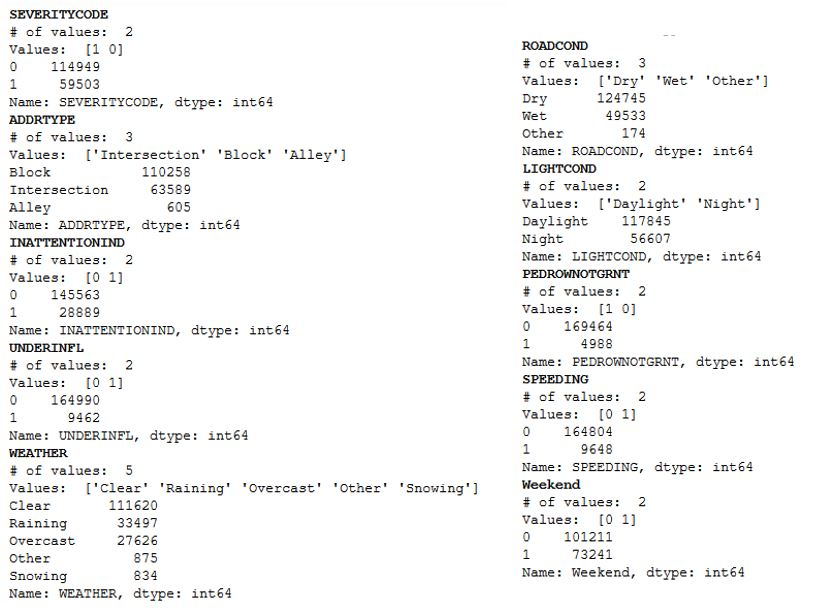

In [1]:
from IPython.display import Image
Image("Dataset post-processing.jpg")